This file contains our own SPSA implementation, to gain insight into detailed intermediate data during optimization. It is applied to a dummy f(x)=0.5+0.5 cos(x)^2 function which represents the case of a single qubit, single rotation gate.


In [1]:
"""
Single element SPSA for cosine^2 cost minimization
Has MAXITER setting or termination condition when theta gets close to pi
"""
import csv
import time
import numpy as np
import matplotlib.pyplot as plt


def cost(theta):
    value = 0.5+0.5*np.cos(theta)
    return value

print("Cost function (0.2):", cost(0.2))

MAXITER = 500     # maximum iteration
theta0 = 0.2


a = 1
c = 1
A = 5   # choose this to be "much less than the maximum number of iterations allowed"
alpha = 0.602     # recommended
gamma = 0.101     # recommended 

f = open('mySPSA.csv', 'w')  # overwrite the csv
f.close()

k = 0       # initialize counter

def mySPSA(theta0, cost_function, MAXITER):
    theta = theta0   # initial guess
    endpoint = -1    # flag, will change to k if stopped
    for k in range(MAXITER):
        a_k = a/((A+k+1)**alpha)
        c_k = c/((k+1)**gamma)
    
        # use Bernoulli +-1 distribution for perturbation
        coin = np.random.random()
        if coin<0.5:  
            perturb = -1
        else:
            perturb = +1
        
        gradient = (cost_function(theta + c_k*perturb) -\
                cost_function(theta - c_k*perturb))/(2*c_k)*(1/perturb)
        theta = theta - a_k*gradient # update theta
        
        # to record data for plotting
        with open('mySPSA.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow([theta,cost_function(theta)])
            
        # test for early break condition
        if abs(theta-3.14) <= 0.001:  
            print("Done at step", k)
            endpoint = k          # if k is not -1, then early stop.
            break
    print("Optimized theta is", theta)
    return theta, endpoint
    
start_time = time.time()
print(mySPSA(theta0,cost,MAXITER))
print("--- %s seconds ---" % round((time.time() - start_time),1))

Cost function (0.2): 0.9900332889206208
Done at step 293
Optimized theta is 3.1390052930111096
(3.1390052930111096, 293)
--- 0.0 seconds ---


Angle changed from 0.2284 to 3.1390


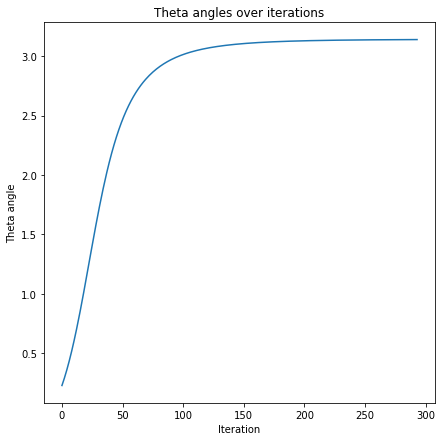

In [2]:
# displaying optimizer convergence trajectory
theta_list = []    # list for jupyter
cost_list = []
iteration = []

with open('mySPSA.csv') as f:
    reader = csv.reader(f)
    count = 0
    for row in reader:
        theta_list.append(float(row[0]))
        cost_list.append(float(row[1]))
        iteration.append(count)
        count += 1

# plot VQE cost trajectory
plt.figure(figsize=(7,7))   # bigger size
plt.plot(iteration, theta_list)
plt.ylabel('Theta angle')
plt.xlabel('Iteration')
plt.title('Theta angles over iterations')

start_angle = '{0:.4f}'.format(theta_list[0])
end_angle = '{0:.4f}'.format(theta_list[-1])

print('Angle changed from', start_angle, 'to', end_angle) # first to last

Cost decreased from 0.9870 to 0.0000


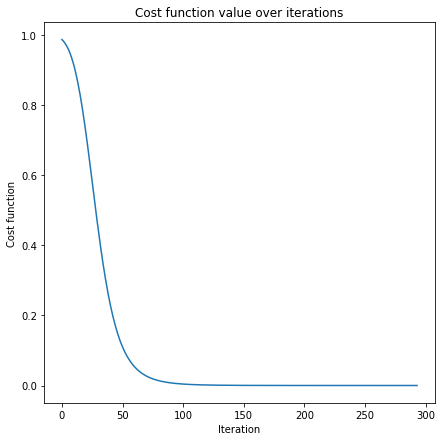

In [3]:
plt.figure(figsize=(7,7))   # bigger size
plt.plot(iteration, cost_list)
plt.ylabel('Cost function')
plt.xlabel('Iteration')
plt.title('Cost function value over iterations')

start_cost = '{0:.4f}'.format(cost_list[0])
end_cost = '{0:.4f}'.format(cost_list[-1])

print('Cost decreased from', start_cost, 'to', end_cost) # first to last